In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding' 
import seaborn as sns

# 전체 데이터 정보

In [2]:
df = pd.read_csv('./Jobis_3o3.csv')
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [3]:
# 전체 데이터 정보확인. 3가지 수입정보에서 NaN값이 많이 보인다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [4]:
df = df.fillna('0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  100000 non-null  object 
 7   income_사업  100000 non-null  object 
 8   income_기타  100000 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 6.2+ MB


In [5]:
# 데이터 타입을 계산하기 편하게 int와 float으로 변경하면서 결제여부도 숫자로 변경한다. 
df['income_근로']=df['income_근로'].astype('int64')
df['income_사업']=df['income_사업'].astype('int64')
df['income_기타']=df['income_기타'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  100000 non-null  int64  
 7   income_사업  100000 non-null  int64  
 8   income_기타  100000 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(1)
memory usage: 6.2+ MB


In [6]:
# 전체 데이터 통계. 전체적으로 편차가 심해 평균의 데이터는 유용하지 않다.
# 단, 나이는 어린 사용자가 많아 보이고,
# 결제를 한 사람과 안한 사람의 비율은 약 2:1 정도 된다.
df.describe().iloc[1:]

,age,year,refund,fee,income_근로,income_사업,income_기타
mean,29.00096,2018.111300,2.081422e+05,7247.641000,2.623921e+06,1.182567e+06,1.607252e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,5.260655e+06,2.254789e+06,7.958761e+05
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.000000e+00,3.100000e+04,0.000000e+00
50%,27.00000,2018.000000,9.900000e+04,4300.000000,0.000000e+00,3.280000e+05,0.000000e+00
75%,31.00000,2019.000000,2.540000e+05,8500.000000,2.994000e+06,1.235000e+06,2.000000e+03
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


# 1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?

# 데이터 전처리 과정
결제여부와의 영향이기 때문에 모든 컬럼을 has_paid 컬럼과 비교해본다.

**1. 나이와 결제여부 (age - has_paid)**  
나이는 10살 간격으로 끊었고, 컬럼명은 나이의 앞자리 수로 표시했다. (추후 변경 필요)

Text(0.5, 1.0, '나이별 별 결제비율')

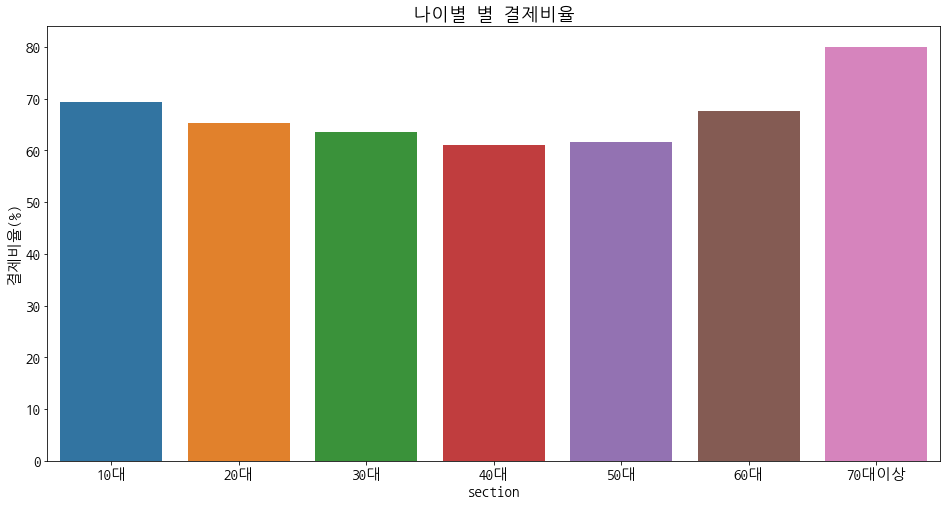

In [7]:
age_df = df.copy()
age_df['section'] = ''

age_df['section'][age_df['age']<20] = '10대'
age_df['section'][(age_df['age']<30) & (age_df['age']>=20)] = '20대'
age_df['section'][(age_df['age']<40) & (age_df['age']>=30)] = '30대'
age_df['section'][(age_df['age']<50) & (age_df['age']>=40)] = '40대'
age_df['section'][(age_df['age']<60) & (age_df['age']>=50)] = '50대'
age_df['section'][(age_df['age']<70) & (age_df['age']>=60)] = '60대'
age_df['section'][age_df['age']>=70] = '70대이상'

age_df = pd.crosstab(age_df['section'], age_df['has_paid'])
age_df['합'] = age_df[0] + age_df[1]
age_df['결제비율(%)'] = round(age_df[1] / age_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=age_df, x=age_df.index, y='결제비율(%)')
plt.title('나이별 별 결제비율')

- 모든 나이에서 결제를 한 비율이 대부분 60~70%정도 된다.
- 나이별로 결제여부를 확인하는 것은 유의미하지 않다.

**2. 성별과 결제여부 (gender - has_paid)**

Text(0.5, 1.0, '성별 별 결제비율')

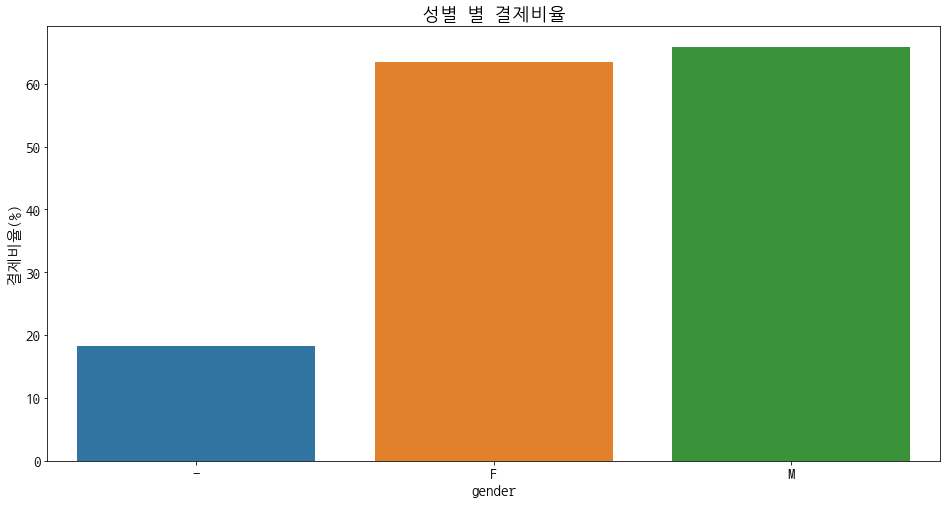

In [8]:
gender_df = df.copy()
gender_df = pd.crosstab(gender_df['gender'], gender_df['has_paid'])
gender_df['합'] = gender_df[0] + gender_df[1]
gender_df['결제비율(%)'] = round(gender_df[1] / gender_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=gender_df, x=gender_df.index, y='결제비율(%)')
plt.title('성별 별 결제비율')

- 각 성별에 대한 결제비율이 비슷하므로 성별로 확인하는 것은 유의미하지 않다.
- 잘못된 값 (-)이 들어가 있지만 그 갯수가 22개로 전체 결과에 영향이 없을정도로 굉장히 적으므로 무시한다.

In [9]:
df['gender'].value_counts()

M    50477
F    49501
-       22
Name: gender, dtype: int64

**3. 연도와 결제여부 (year - has_paid)**

Text(0.5, 1.0, '연도별 별 결제비율')

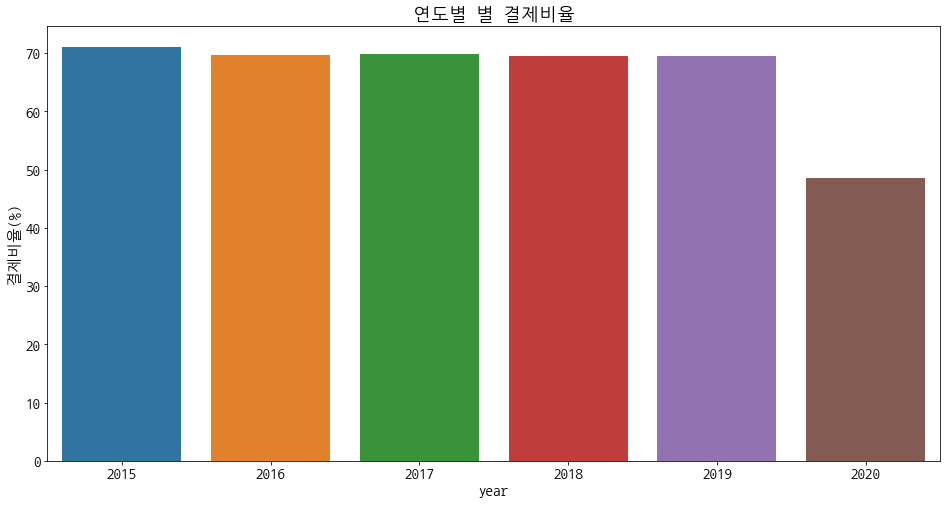

In [10]:
year_df = df.copy()
year_df = pd.crosstab(year_df['year'], year_df['has_paid'])
year_df['합'] = year_df[0] + year_df[1]
year_df['결제비율(%)'] = round(year_df[1] / year_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=year_df, x=year_df.index, y='결제비율(%)')
plt.title('연도별 별 결제비율')

- 2015년 부터 매해 70%정도의 사용자가 결제를 했지만 2020년에 결제비율이 50% 이하로 급감했다.

**4. 환급금액과 결제여부 (refund - has_paid)**  
환급금액의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '환급금액 별 결제비율(단위: 만원)')

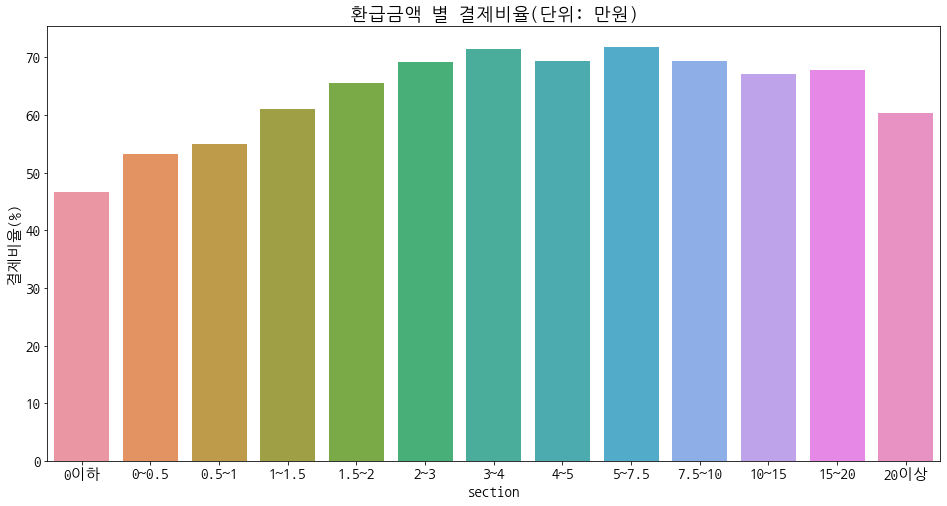

In [11]:
# 환급금액은 높아질수록 결제비율이 높아진다.
refund_df = df.copy()
refund_df['section'] =''

refund_df['section'][refund_df['refund']<0] = '0이하'
refund_df['section'][(refund_df['refund']<5000) & (refund_df['refund']>=0)] = '0~0.5'
refund_df['section'][(refund_df['refund']<10000) & (refund_df['refund']>=5000)] = '0.5~1'
refund_df['section'][(refund_df['refund']<15000) & (refund_df['refund']>=10000)] = '1~1.5'
refund_df['section'][(refund_df['refund']<20000) & (refund_df['refund']>=15000)] = '1.5~2'
refund_df['section'][(refund_df['refund']<30000) & (refund_df['refund']>=20000)] = '2~3'
refund_df['section'][(refund_df['refund']<40000) & (refund_df['refund']>=30000)] = '3~4'
refund_df['section'][(refund_df['refund']<50000) & (refund_df['refund']>=40000)] = '4~5'
refund_df['section'][(refund_df['refund']<75000) & (refund_df['refund']>=50000)] = '5~7.5'
refund_df['section'][(refund_df['refund']<100000) & (refund_df['refund']>=75000)] = '7.5~10'
refund_df['section'][(refund_df['refund']<150000) & (refund_df['refund']>=100000)] = '10~15'
refund_df['section'][(refund_df['refund']<200000) & (refund_df['refund']>=150000)] = '15~20'
refund_df['section'][(refund_df['refund']>=200000)] = '20이상'

refund_df = pd.crosstab(refund_df['section'], refund_df['has_paid'])
refund_df['합'] = refund_df[0] + refund_df[1]
refund_df['결제비율(%)'] = round(refund_df[1] / refund_df['합'],3) * 100

plt.figure(figsize=(16,8))
sns.barplot(data=refund_df, x=refund_df.index,
            order=['0이하','0~0.5','0.5~1','1~1.5','1.5~2','2~3','3~4','4~5',
                '5~7.5','7.5~10','10~15','15~20','20이상'],
            y='결제비율(%)')
plt.title('환급금액 별 결제비율(단위: 만원)')

- 환급금액이 올라갈수록 결제비율이 높아지다가 4만원을 기점으로 소폭 하락하는 형태이다.
- 환급금액은 결제여부와 약간의 관련이 있다고 볼 수 있다.

**5. 수수료와 결제여부 (fee - has_paid)**  
수수료의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '수수료 별 결제비율(단위: 만원)')

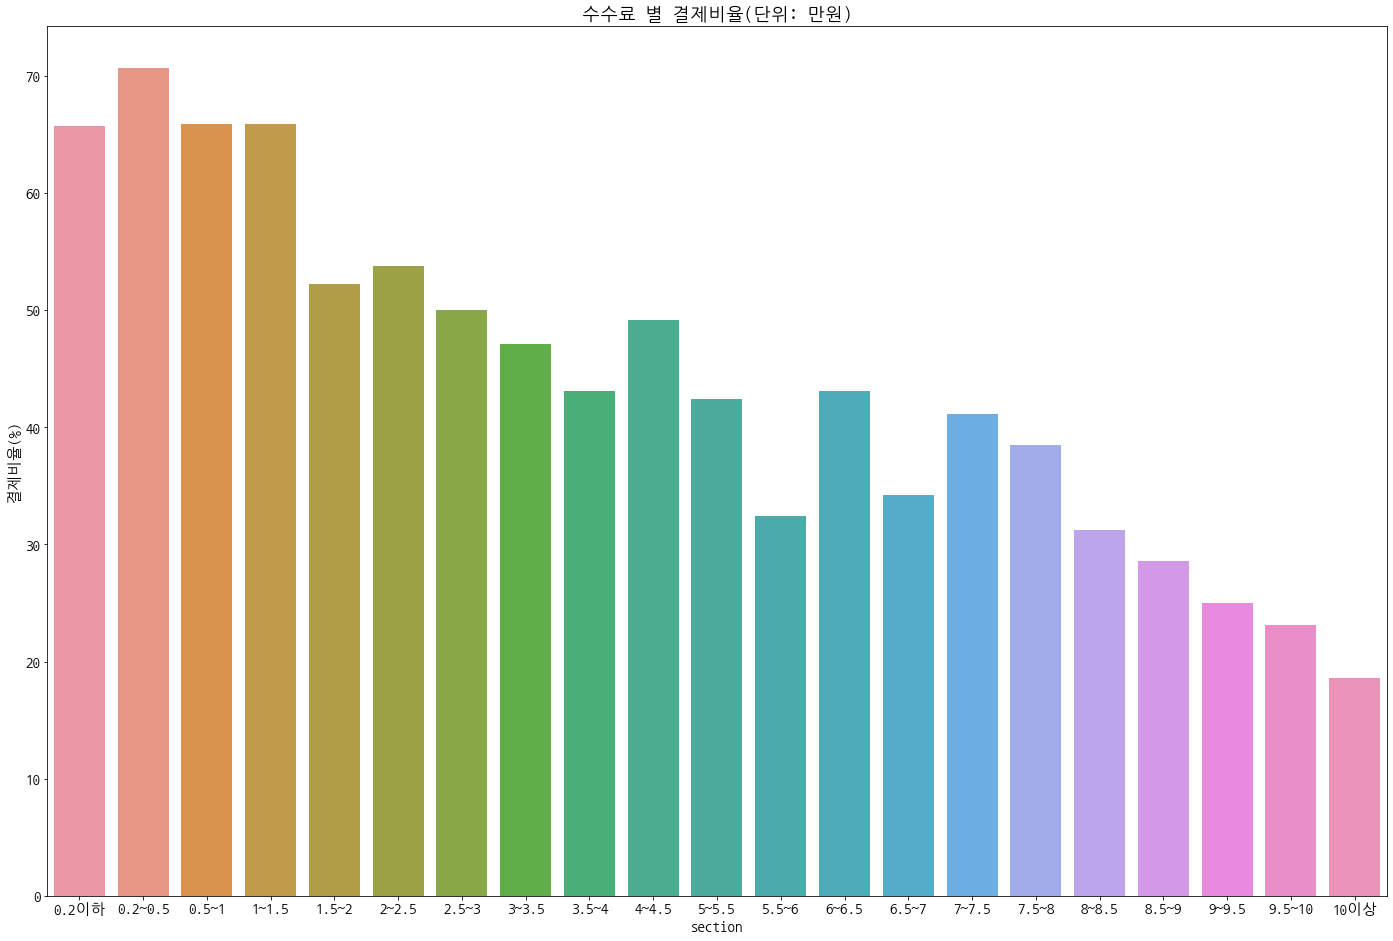

In [12]:
# 수수료는 높아질수록 결제 비율이 낮아졌다.
fee_df = df.copy()
fee_df['section'] = ''
fee_df['section'][fee_df['fee']<=1000] = '0.2이하'
fee_df['section'][(fee_df['fee']<5000) & (fee_df['fee']>1000)] = '0.2~0.5'
fee_df['section'][(fee_df['fee']<10000) & (fee_df['fee']>=5000)] = '0.5~1'
fee_df['section'][(fee_df['fee']<15000) & (fee_df['fee']>=10000)] = '1~1.5'
fee_df['section'][(fee_df['fee']<20000) & (fee_df['fee']>=15000)] = '1.5~2'
fee_df['section'][(fee_df['fee']<25000) & (fee_df['fee']>=20000)] = '2~2.5'
fee_df['section'][(fee_df['fee']<30000) & (fee_df['fee']>=25000)] = '2.5~3'
fee_df['section'][(fee_df['fee']<35000) & (fee_df['fee']>=30000)] = '3~3.5'
fee_df['section'][(fee_df['fee']<40000) & (fee_df['fee']>=35000)] = '3.5~4'
fee_df['section'][(fee_df['fee']<45000) & (fee_df['fee']>=40000)] = '4~4.5'
fee_df['section'][(fee_df['fee']<50000) & (fee_df['fee']>=45000)] = '4.5~5'
fee_df['section'][(fee_df['fee']<55000) & (fee_df['fee']>=50000)] = '5~5.5'
fee_df['section'][(fee_df['fee']<60000) & (fee_df['fee']>=55000)] = '5.5~6'
fee_df['section'][(fee_df['fee']<65000) & (fee_df['fee']>=60000)] = '6~6.5'
fee_df['section'][(fee_df['fee']<70000) & (fee_df['fee']>=65000)] = '6.5~7'
fee_df['section'][(fee_df['fee']<75000) & (fee_df['fee']>=70000)] = '7~7.5'
fee_df['section'][(fee_df['fee']<80000) & (fee_df['fee']>=75000)] = '7.5~8'
fee_df['section'][(fee_df['fee']<85000) & (fee_df['fee']>=80000)] = '8~8.5'
fee_df['section'][(fee_df['fee']<90000) & (fee_df['fee']>=85000)] = '8.5~9'
fee_df['section'][(fee_df['fee']<95000) & (fee_df['fee']>=90000)] = '9~9.5'
fee_df['section'][(fee_df['fee']<100000) & (fee_df['fee']>=95000)] = '9.5~10'
fee_df['section'][(fee_df['fee']>=100000)] = '10이상'

fee_df = pd.crosstab(fee_df['section'], fee_df['has_paid'])
fee_df['합'] = fee_df[0] + fee_df[1]
fee_df['결제비율(%)'] = round(fee_df[1] / fee_df['합'],3) * 100

plt.figure(figsize=(24,16))
sns.barplot(data=fee_df, x=fee_df.index,
            order=['0.2이하','0.2~0.5','0.5~1','1~1.5','1.5~2','2~2.5','2.5~3','3~3.5',
                    '3.5~4','4~4.5','5~5.5','5.5~6','6~6.5','6.5~7','7~7.5','7.5~8',
                    '8~8.5','8.5~9','9~9.5','9.5~10','10이상'],
            y='결제비율(%)')
plt.title('수수료 별 결제비율(단위: 만원)')

- 수수료가 올라가도 결제비율이 일정 수준을 유지하다가 1.5만원을 기점으로 그 이상의 수수료에서 급격하게 하락한다.
- 수수료는 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**6. 근로소득과 결제여부 (income_근로 - has_paid)**  
근로소득의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '근로소득 별 결제비율')

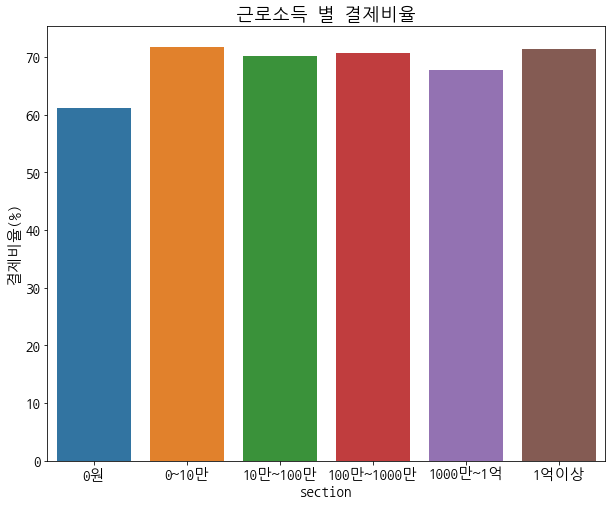

In [13]:
incomeW_df = df.copy()
incomeW_df['section'] = ''

incomeW_df['section'][(incomeW_df['income_근로']==0)] = '0원'
incomeW_df['section'][(incomeW_df['income_근로']<100000) & (incomeW_df['income_근로']>0)] = '0~10만'
incomeW_df['section'][(incomeW_df['income_근로']<1000000) & (incomeW_df['income_근로']>=100000)] = '10만~100만'
incomeW_df['section'][(incomeW_df['income_근로']<10000000) & (incomeW_df['income_근로']>=1000000)] = '100만~1000만'
incomeW_df['section'][(incomeW_df['income_근로']<100000000) & (incomeW_df['income_근로']>=10000000)] = '1000만~1억'
incomeW_df['section'][(incomeW_df['income_근로']>=100000000)] = '1억이상'

incomeW_df = pd.crosstab(incomeW_df['section'], incomeW_df['has_paid'])

incomeW_df['합'] = incomeW_df[0] + incomeW_df[1]
incomeW_df['결제비율(%)'] = round(incomeW_df[1] / incomeW_df['합'],3) * 100
incomeW_df

plt.figure(figsize=(10,8))
sns.barplot(data=incomeW_df, x=incomeW_df.index, 
            order=['0원','0~10만','10만~100만','100만~1000만','1000만~1억','1억이상'],
            y='결제비율(%)')
plt.title('근로소득 별 결제비율')

- 근로소득으로 분류했을 때는 모든 분류에서 70%정도 결제비율을 기록하고 있다.
- 근로소득이 없던 사람이 상대적으로 적은 비율이지만 전체 결제율과 비슷한 60%정도를 기록했다.
- 근로소득은 결제여부와 관련이 없다고 할 수 있다.

**7. 사업소득과 결제여부 (income_사업 - has_paid)**  

Text(0.5, 1.0, '사업소득 별 결제비율')

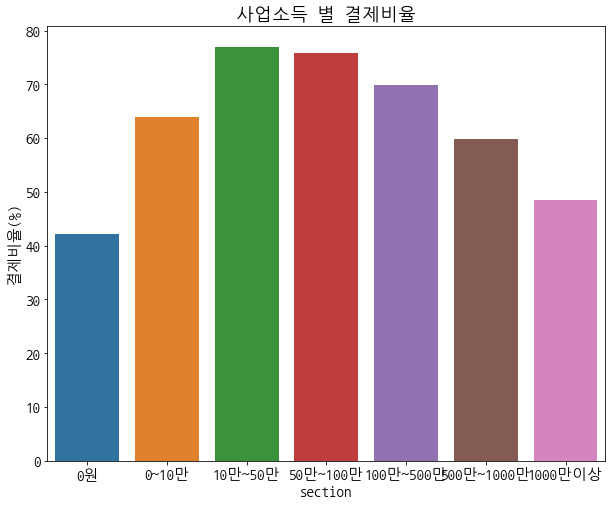

In [14]:
incomeB_df = df.copy()
incomeB_df['section'] = ''

incomeB_df['section'][incomeB_df['income_사업'] == 0] = '0원'
incomeB_df['section'][(incomeB_df['income_사업']<100000) & (incomeB_df['income_사업']>0)] = '0~10만'
incomeB_df['section'][(incomeB_df['income_사업']<500000) & (incomeB_df['income_사업']>=100000)] = '10만~50만'
incomeB_df['section'][(incomeB_df['income_사업']<1000000) & (incomeB_df['income_사업']>=500000)] = '50만~100만'
incomeB_df['section'][(incomeB_df['income_사업']<5000000) & (incomeB_df['income_사업']>=1000000)] = '100만~500만'
incomeB_df['section'][(incomeB_df['income_사업']<10000000) & (incomeB_df['income_사업']>=5000000)] = '500만~1000만'
incomeB_df['section'][(incomeB_df['income_사업']>=10000000)] = '1000만이상'

incomeB_df = pd.crosstab(incomeB_df['section'], incomeB_df['has_paid'])

incomeB_df['합'] = incomeB_df[0] + incomeB_df[1]
incomeB_df['결제비율(%)'] = round(incomeB_df[1] / incomeB_df['합'],3) * 100

plt.figure(figsize=(10,8))
sns.barplot(data=incomeB_df, x=incomeB_df.index, 
            order=['0원','0~10만','10만~50만','50만~100만','100만~500만','500만~1000만','1000만이상'],
            y='결제비율(%)')
plt.title('사업소득 별 결제비율')

In [15]:
incomeB_df

has_paid,False,True,합,결제비율(%)
section,,,,
0~10만,4654,8269,12923,64.0
0원,12636,9194,21830,42.1
1000만이상,763,715,1478,48.4
100만~500만,7022,16198,23220,69.8
10만~50만,5147,17188,22335,77.0
500만~1000만,1837,2735,4572,59.8
50만~100만,3298,10344,13642,75.8


- 사업소득이 올라가도 결제비율이 일정 수준을 유지하다가 100만원을 기점으로 그 이상에서 급격하게 하락한다.
- 사업소득과 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**8. 기타소득과 결제여부 (income_기타 - has_paid)**  
수수료의 간격은 임의로 세팅을 했고, 컬럼명 또한 그 구간의 최대금액으로 표시했다. 이부분은 추후 변경이 필요.

Text(0.5, 1.0, '기타소득 별 결제비율')

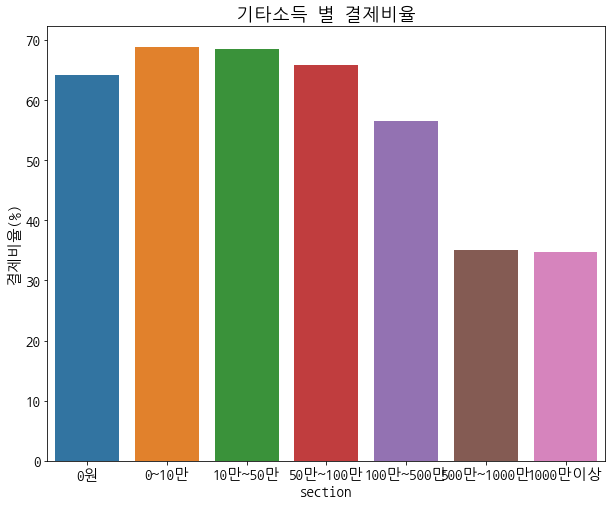

In [16]:
incomeE_df = df.copy()
incomeE_df['section'] = ''

incomeE_df['section'][incomeE_df['income_기타'] == 0] = '0원'
incomeE_df['section'][(incomeE_df['income_기타']<100000) & (incomeE_df['income_기타']>0)] = '0~10만'
incomeE_df['section'][(incomeE_df['income_기타']<500000) & (incomeE_df['income_기타']>=100000)] = '10만~50만'
incomeE_df['section'][(incomeE_df['income_기타']<1000000) & (incomeE_df['income_기타']>=500000)] = '50만~100만'
incomeE_df['section'][(incomeE_df['income_기타']<5000000) & (incomeE_df['income_기타']>=1000000)] = '100만~500만'
incomeE_df['section'][(incomeE_df['income_기타']<10000000) & (incomeE_df['income_기타']>=5000000)] = '500만~1000만'
incomeE_df['section'][(incomeE_df['income_기타']>=10000000)] = '1000만이상'

incomeE_df = pd.crosstab(incomeE_df['section'], incomeE_df['has_paid'])
incomeE_df['합'] = incomeE_df[0] + incomeE_df[1]
incomeE_df['결제비율(%)'] = round(incomeE_df[1] / incomeE_df['합'],3) * 100

plt.figure(figsize=(10,8))
sns.barplot(data=incomeE_df, x=incomeE_df.index,
            order=['0원','0~10만','10만~50만','50만~100만','100만~500만','500만~1000만','1000만이상'],
            y='결제비율(%)')
plt.title('기타소득 별 결제비율')

- 기타소득이 올라가도 결제비율이 일정 수준을 유지하다가 100만원을 기점으로 그 이상에서 급격하게 하락한다.
- 기타소득은 결제여부와 어느정도 관련이 있다고 볼 수 있다.

**9. 연도별 데이터 확인**  
위 차트중 2020년에서 결제비율이 급감한 것을 확인했었다. 따라서 2020년의 데이터가 다른 해와 무엇이 다른지 확인해본다.

In [17]:
df.groupby('year').mean()

,age,refund,fee,has_paid,income_근로,income_사업,income_기타
year,,,,,,,
2015,30.748808,162656.210790,4396.461731,0.710665,4.291267e+05,7.168088e+05,32737.766625
2016,30.553511,171084.237763,5579.752749,0.697046,1.993295e+06,9.055580e+05,151482.714008
2017,29.636296,176735.467276,5852.214919,0.697571,2.125833e+06,9.553367e+05,150700.428694
2018,28.836261,179430.415853,5994.825602,0.694991,2.542636e+06,9.500879e+05,154357.203623
2019,28.228049,173935.226946,5831.383744,0.694799,3.115681e+06,8.984142e+05,135792.150465
2020,28.148179,314651.459087,12021.541502,0.485241,3.364365e+06,2.034195e+06,222154.402489


- 위 8개의 차트 자료중 수수료, 사업소득, 기타소득이 올라갈 때 결제 비율이 떨어지는 것을 확인했었다.
- 그런데 2020년은 다른해에 비해 환급금액, 수수료, 사업소득, 기타소득이 늘어났다.
- 특히 그 중에서도 수수료, 사업소득이 많이 늘어났다.

# 정리
- 위 자료를 확인해봤을때 가장 연관성이 있는것은 수수료라고 생각한다.
- 수수료 차트만 보아도, 조회 후 **일정금액에서 비싸지면 결제하기를 꺼려했을 것**으로 예상할 수 있다.
- 무료배송을 위해 물건을 추가로 구매하거나 주차요금을 아끼기 위해 먼곳이더라도 무료주차장에 주차하는 것처럼 당장의 지출을 아까워하며 다른 방법을 찾는 심리가 여기서도 똑같이 적용했다고 볼 수 있다.

# 2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야할까?

먼저 수수료(fee)와 상관관계가 높은 컬럼을 찾아보자

Text(0.5, 1.0, '특징들간의 Correlation')

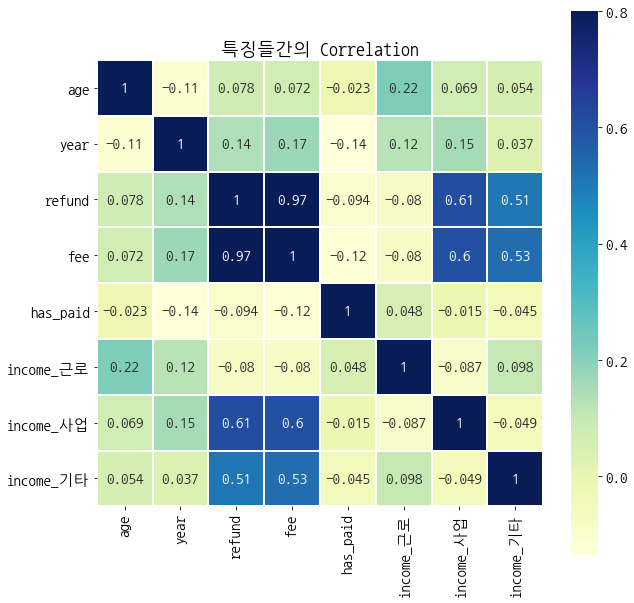

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu');
plt.title('특징들간의 Correlation')

- 환급금액과 수수료는 굉장히 강한 양의 상관관계를 형성하고 있다.
- 또 이 두가지는 사업소득과 기타소득 두가지와 양의 상관관계를 형성하고 있다.
- 따라서 사업소득과 기타소득이 높으면 수수료도 높아진다고 말할 수 있다.  

=> ***사업소득과 기타소득이 높은 고객을 잡는다면 고액의 수수료를 확보하며, 회사수익을 늘릴 수 있다.***

In [19]:
true_df = df[df['has_paid'] == True]
false_df = df[df['has_paid'] == False]
print('<전체 조회 고객>')
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(false_df.describe().loc['mean','fee'],1)))

<전체 조회 고객>
결제한 사람의 전체 수수료 평균: 6209.5원
결제하지 않은 사람의 전체 수수료 평균: 9145.7원


In [20]:
Bhigh100_true_df = true_df[true_df['income_사업'] >= 1000000]
Bhigh100_false_df = false_df[false_df['income_사업'] >= 1000000]
Bhigh500_true_df = true_df[true_df['income_사업'] >= 5000000]
Bhigh500_false_df = false_df[false_df['income_사업'] >= 5000000]
Bhigh1000_true_df = true_df[true_df['income_사업'] >= 10000000]
Bhigh1000_false_df = false_df[false_df['income_사업'] >= 10000000]

print('\n<사업소득 100만원 이상 기준, 전체인원: {}>'. format(len(Bhigh100_true_df)+len(Bhigh100_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Bhigh100_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Bhigh100_false_df.describe().loc['mean','fee'],1)))
print('\n<사업소득 500만원 이상 기준, 전체인원: {}>'. format(len(Bhigh500_true_df)+len(Bhigh500_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Bhigh500_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Bhigh500_false_df.describe().loc['mean','fee'],1)))
print('\n<사업소득 1000만원 이상 기준, 전체인원: {}>'. format(len(Bhigh1000_true_df)+len(Bhigh1000_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Bhigh1000_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Bhigh1000_false_df.describe().loc['mean','fee'],1)))


<사업소득 100만원 이상 기준, 전체인원: 29270>
결제한 사람의 전체 수수료 평균: 13873.1원
결제하지 않은 사람의 전체 수수료 평균: 19809.8원

<사업소득 500만원 이상 기준, 전체인원: 6050>
결제한 사람의 전체 수수료 평균: 28469.8원
결제하지 않은 사람의 전체 수수료 평균: 33906.2원

<사업소득 1000만원 이상 기준, 전체인원: 1478>
결제한 사람의 전체 수수료 평균: 40007.6원
결제하지 않은 사람의 전체 수수료 평균: 40863.6원


In [21]:
Ehigh100_true_df = true_df[true_df['income_기타'] >= 1000000]
Ehigh100_false_df = false_df[false_df['income_기타'] >= 1000000]
Ehigh500_true_df = true_df[true_df['income_기타'] >= 5000000]
Ehigh500_false_df = false_df[false_df['income_기타'] >= 5000000]
Ehigh1000_true_df = true_df[true_df['income_기타'] >= 10000000]
Ehigh1000_false_df = false_df[false_df['income_기타'] >= 10000000]

print('\n<기타소득 100만원 이상 기준, 전체인원: {}>'. format(len(Ehigh100_true_df)+len(Ehigh100_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Ehigh100_true_df.describe().loc['mean','fee'],1))) 
print('\n<기타소득 100만원 이상 기준, 전체인원: {}>'. format(len(Ehigh500_true_df)+len(Ehigh500_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Ehigh500_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Ehigh500_false_df.describe().loc['mean','fee'],1)))
print('\n<기타소득 100만원 이상 기준, 전체인원: {}>'. format(len(Ehigh1000_true_df)+len(Ehigh1000_false_df)))
print('결제한 사람의 전체 수수료 평균: {}원'.format(round(Ehigh1000_true_df.describe().loc['mean','fee'],1)))
print('결제하지 않은 사람의 전체 수수료 평균: {}원'.format(round(Ehigh1000_false_df.describe().loc['mean','fee'],1)))


<기타소득 100만원 이상 기준, 전체인원: 3852>
결제한 사람의 전체 수수료 평균: 22678.9원

<기타소득 100만원 이상 기준, 전체인원: 452>
결제한 사람의 전체 수수료 평균: 63083.5원
결제하지 않은 사람의 전체 수수료 평균: 95511.6원

<기타소득 100만원 이상 기준, 전체인원: 98>
결제한 사람의 전체 수수료 평균: 112588.2원
결제하지 않은 사람의 전체 수수료 평균: 150345.3원


- 사업&기타소득 모두 고액으로 필터링 할수록 평균 수수료 금액이 상승
- 사업소득에 비해 기타소득의 수수료가 2~4배정도 높아지지만, 해당하는 인원은 사업소득이 10배 정도로 많은 차이가 남.
- 따라서 기타소득보다 **사업소득이 높은 고객을 더 많이 잡는 것이 유리**하다고 본다.

위의 내용을 봤을 때 사업소득이 높은 고객은 수수료까지 높기 때문에 수수료결제의 합을 높일 수 있다. 하지만 1번 문제에서 확인했듯이 **수수료가 높아지면 결제를 꺼려하는 경향**이 있기 때문에 이들을 결제까지 유도할 수 있는 방안이 필요하다.

# 정리
1. 사업소득과 기타소득이 높은 고객이 환급금액이 높을 것이고 결국 수수료까지 높았다. 그 중 사업소득이 높은 고객의 수가 더 많기 때문에 이들을 잡는 방안이 필요하다. 따라서 위에 해당하는 고객을 타겟층으로 설정하고 다음 내용을 제안한다.
 - 사업소득을 구분 짓고 구분마다 수수료를 소액 할인해준다.
 - 소득이 높아질 수록 할인 비율을 높여준다. (아래는 예시)   
     사업소득 100만 ~ 500만 - 수수료 5% 감면,  
     사업소득 500만 ~ 1000만 - 수수료 7% 감면,  
     사업소득 1000만이상 - 수수료 10% 감면
  
2. 위의 내용과는 별개로 신규회원 유치를 위해 최초 결제 고객에 한해 수수료를 할인해주는 이벤트를 제안한다.